choosing random point on surface of cylinder


In [34]:
import numpy as np
import math
import random
#from models.brownian1 import brownianClass
import matplotlib.pyplot as plt

from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D
colors=cycle('bgrcmykbgrcmykbgrcmykbgrcmyk') 


In [49]:
class brownian:
    # initializes brownian w x,y,z parameters. self. walk=brownian(x,y,z) bc telling it to define itself
    def __init__(self, xi, yi, zi): #constructor
        # setting xi parameter position (so self.xi is location x on brownian(x,y,z))
        self.xi = xi
        self.yi = yi
        self.zi = zi

    def path(self, nsteps):  #define path itself, so path(100) means nsteps=100 so move 100 times
        # wiener motion, going to create an array w number of steps particle takes from initial position xi
        wx=np.ones(nsteps+1)*self.xi #array filled w same starting point xi
        wy=np.ones(nsteps+1)*self.yi #add one to include origin w number of steps
        wz=np.ones(nsteps+1)*self.zi
        walk=np.zeros((nsteps+1,3))#nsteps+1 is number of rows (add onw for start position) 3 dimensions
        walk[0]=[self.xi,self.yi,self.zi] #initial start position 0
    
    # randomly generate motion in x or y dir from starting point
        for i in range(1, nsteps+1): 
            xii = np.random.choice([-1, 1])
            yii = np.random.choice([-1, 1])
            zii = np.random.choice([-1, 1])
            # weiner process in each direction
            wx[i]=wx[i-1]+(xii/np.sqrt(nsteps)) #moving from previous point dont need cumsum()
            wy[i]=wy[i-1]+(yii/np.sqrt(nsteps))
            wz[i]=wz[i-1]+(zii/np.sqrt(nsteps))
            walk[i]=[wx[i],wy[i],wz[i]]
        print(walk)

        return walk

[[-0.17217072 -0.10177054 10.3545064 ]
 [ 0.14405704 -0.4179983  10.03827863]
 [ 0.46028481 -0.73422607  9.72205086]
 [ 0.77651258 -1.05045384 10.03827863]
 [ 1.09274034 -0.73422607  9.72205086]
 [ 1.40896811 -0.4179983  10.03827863]
 [ 1.72519587 -0.73422607 10.3545064 ]
 [ 2.04142364 -1.05045384 10.03827863]
 [ 2.35765141 -0.73422607 10.3545064 ]
 [ 2.67387917 -1.05045384 10.67073416]
 [ 2.99010694 -1.3666816  10.98696193]]
[[ 0.0955731   0.17568661  7.00026429]
 [ 0.41180086  0.49191437  6.68403652]
 [ 0.0955731   0.17568661  6.36780876]
 [-0.22065467  0.49191437  6.05158099]
 [ 0.0955731   0.80814214  5.73535323]
 [ 0.41180086  0.49191437  5.41912546]
 [ 0.72802863  0.17568661  5.10289769]
 [ 0.41180086 -0.14054116  5.41912546]
 [ 0.0955731   0.17568661  5.10289769]
 [-0.22065467 -0.14054116  5.41912546]
 [-0.53688244 -0.45676893  5.10289769]]
[[ 0.09247849  0.17733507  9.57150914]
 [-0.22374927 -0.13889269  9.25528137]
 [-0.53997704  0.17733507  9.57150914]
 [-0.22374927  0.493562

Text(0.5, 0.92, 'brownian walk')

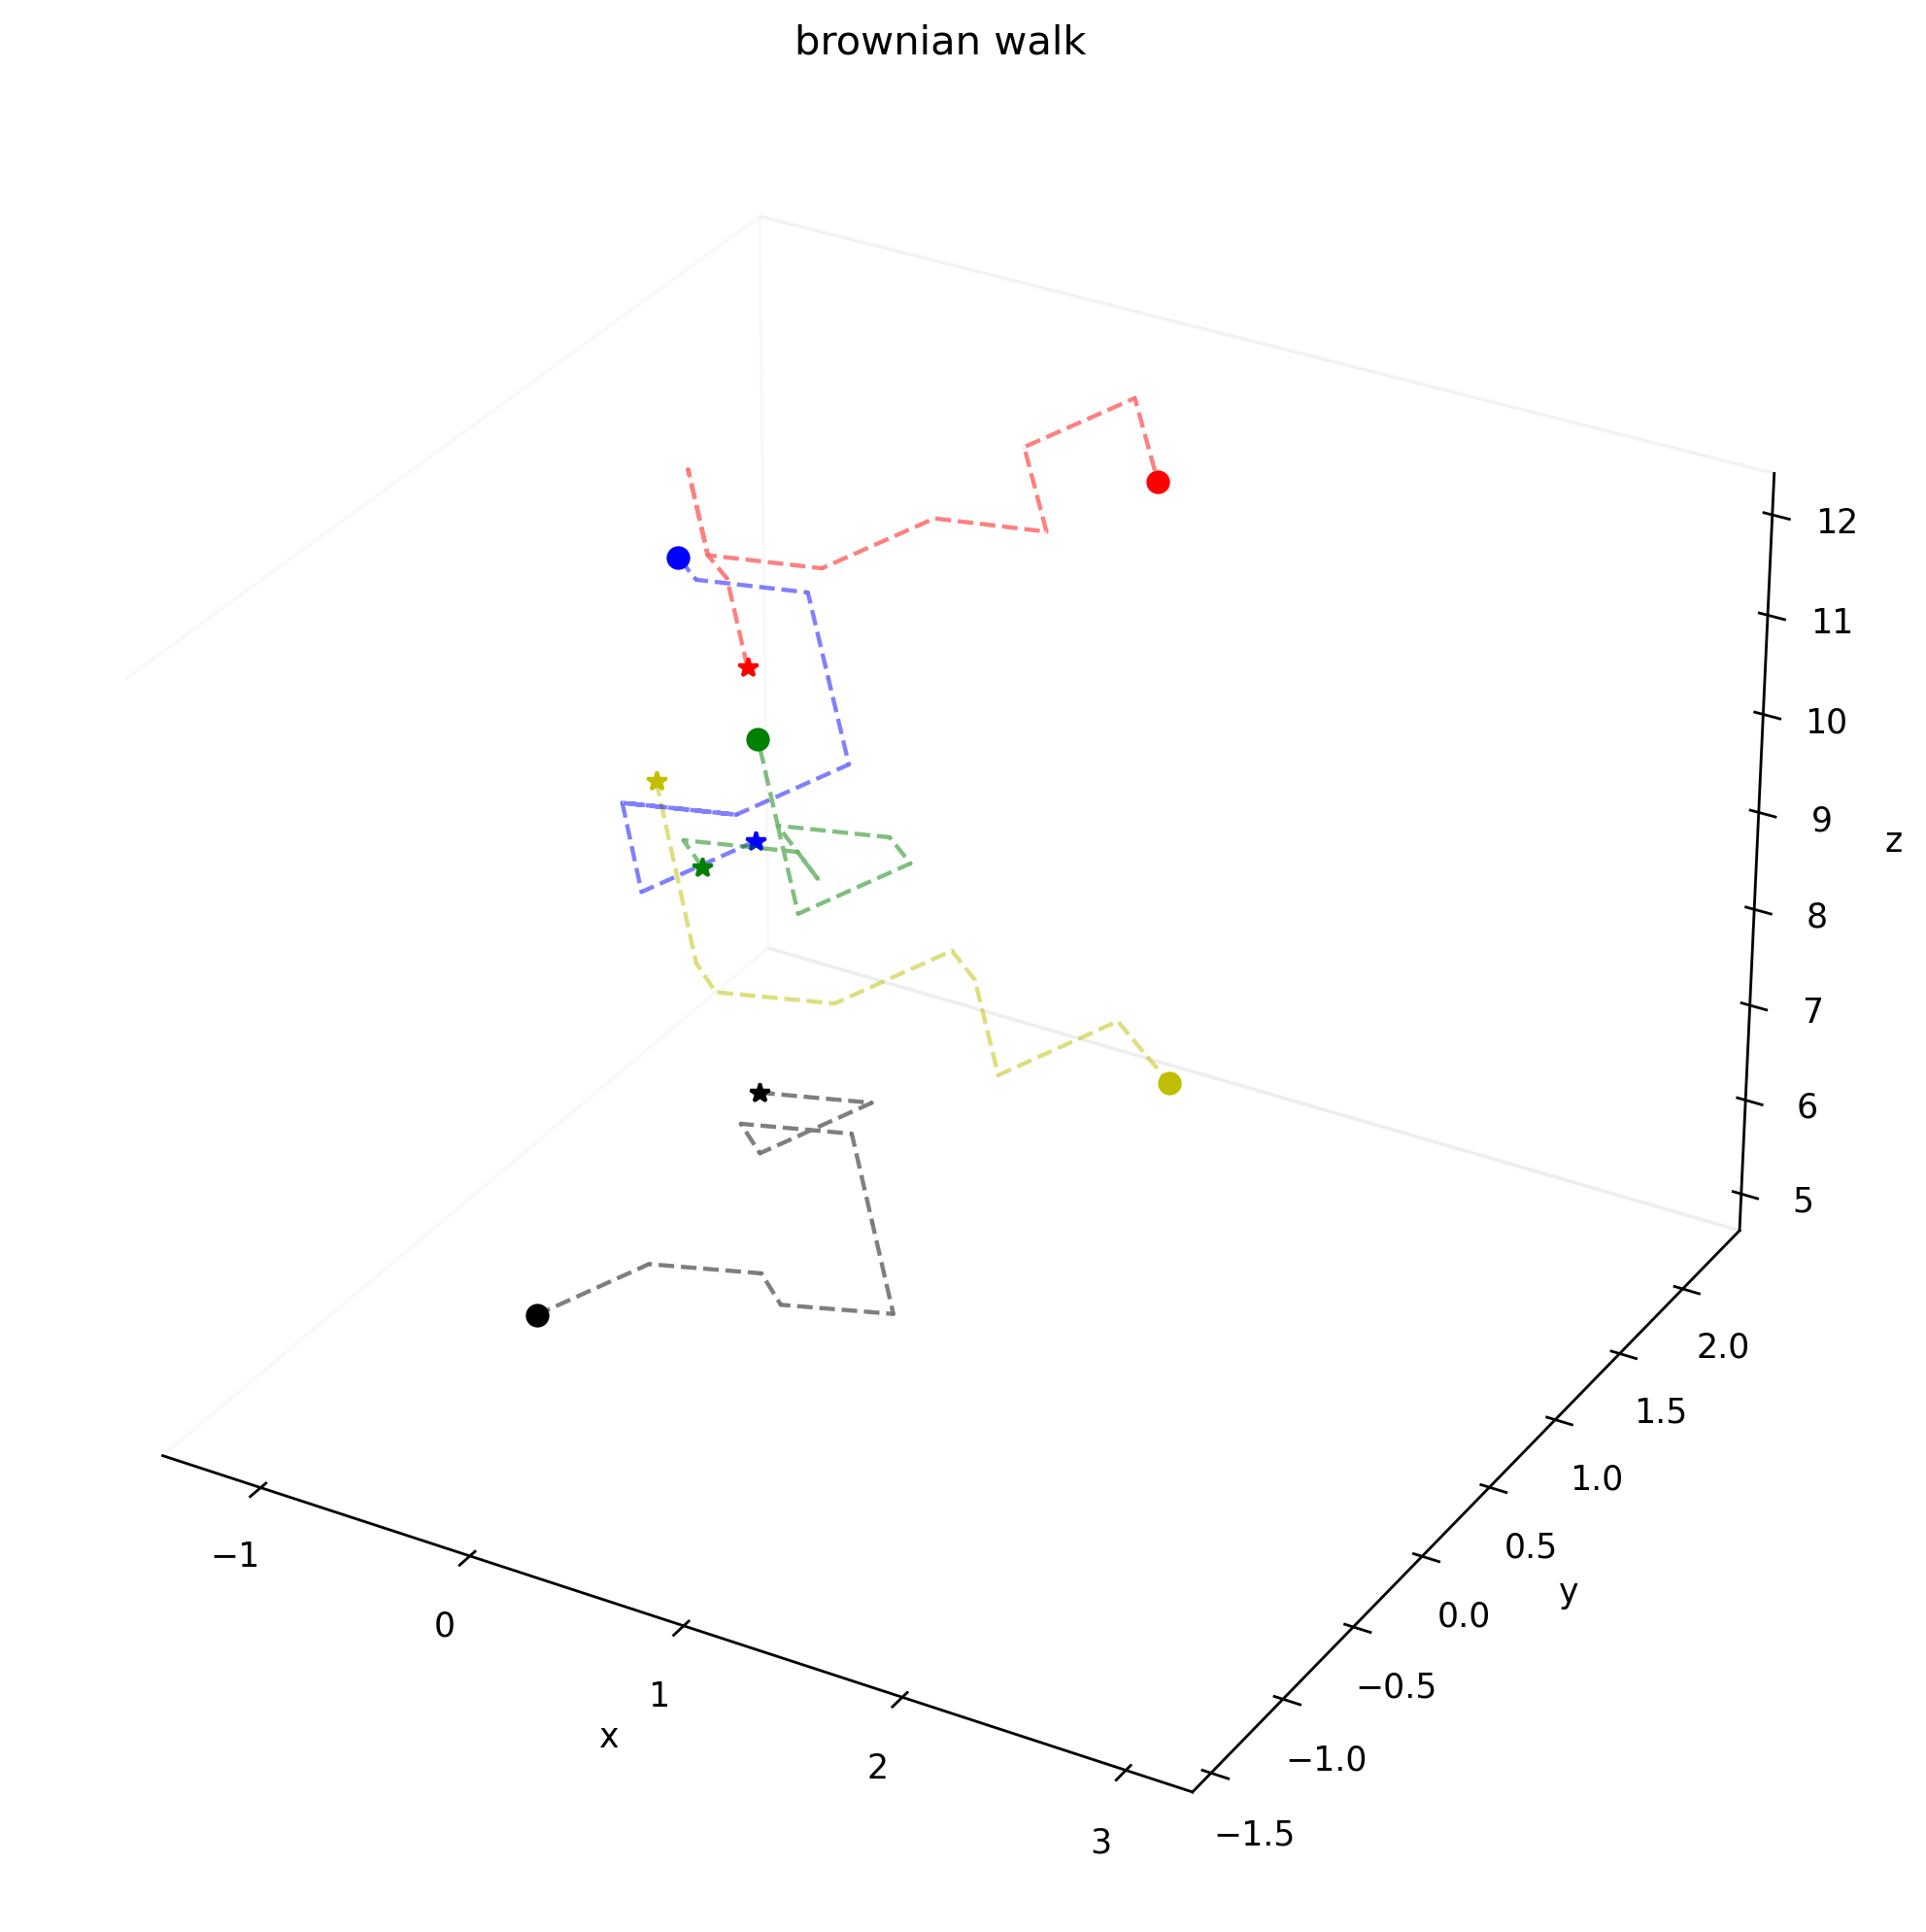

In [50]:
R = .2  # radius of pipe (ft)
L = 15  # length of pipe (ft)
runs=5 #particles 

#plotttingggggggg

fig=plt.figure(figsize=(10,10),dpi=250)
ax=fig.add_subplot(111, projection='3d')
ax.grid(False)
ax.xaxis.pane.fill=ax.yaxis.pane.fill=ax.zaxis.pane.fill=False
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ziprun=list(range(1,runs+1))
for i, col in zip(ziprun, colors):    
    theta = random.uniform(0, 2*math.pi)  # pick any theta 0 to 2pi
    x = R*math.cos(theta)  # on edge of pipe
    y = R*math.sin(theta)
    z = random.uniform(0, L)  # random length
    b = brownian(x, y, z)
    path=b.path(10) #number of steps    
    start=path[:1] #0th index ([start:end],':' mean everything before or after, before 1 (0) then stop position is 1 )
    stop=path[-1:] #end is start -1
    #Plot the path
    ax.scatter3D(path[:,0], path[:,1], path[:,2], c=col,alpha=0.15,s=.05); #syntax w comma:for path x,y,z is 0th,1st,2nd element of path
    ax.plot3D(path[:,0], path[:,1], path[:,2], c=col, alpha=0.5,lw=1.25, ls='--')
    ax.plot3D(start[:,0], start[:,1], start[:,2], c=col, marker='*')
    ax.plot3D(stop[:,0], stop[:,1], stop[:,2], c=col, marker='o');
plt.title('brownian walk')


    


Text(0.5, 0.92, 'brownian walk')

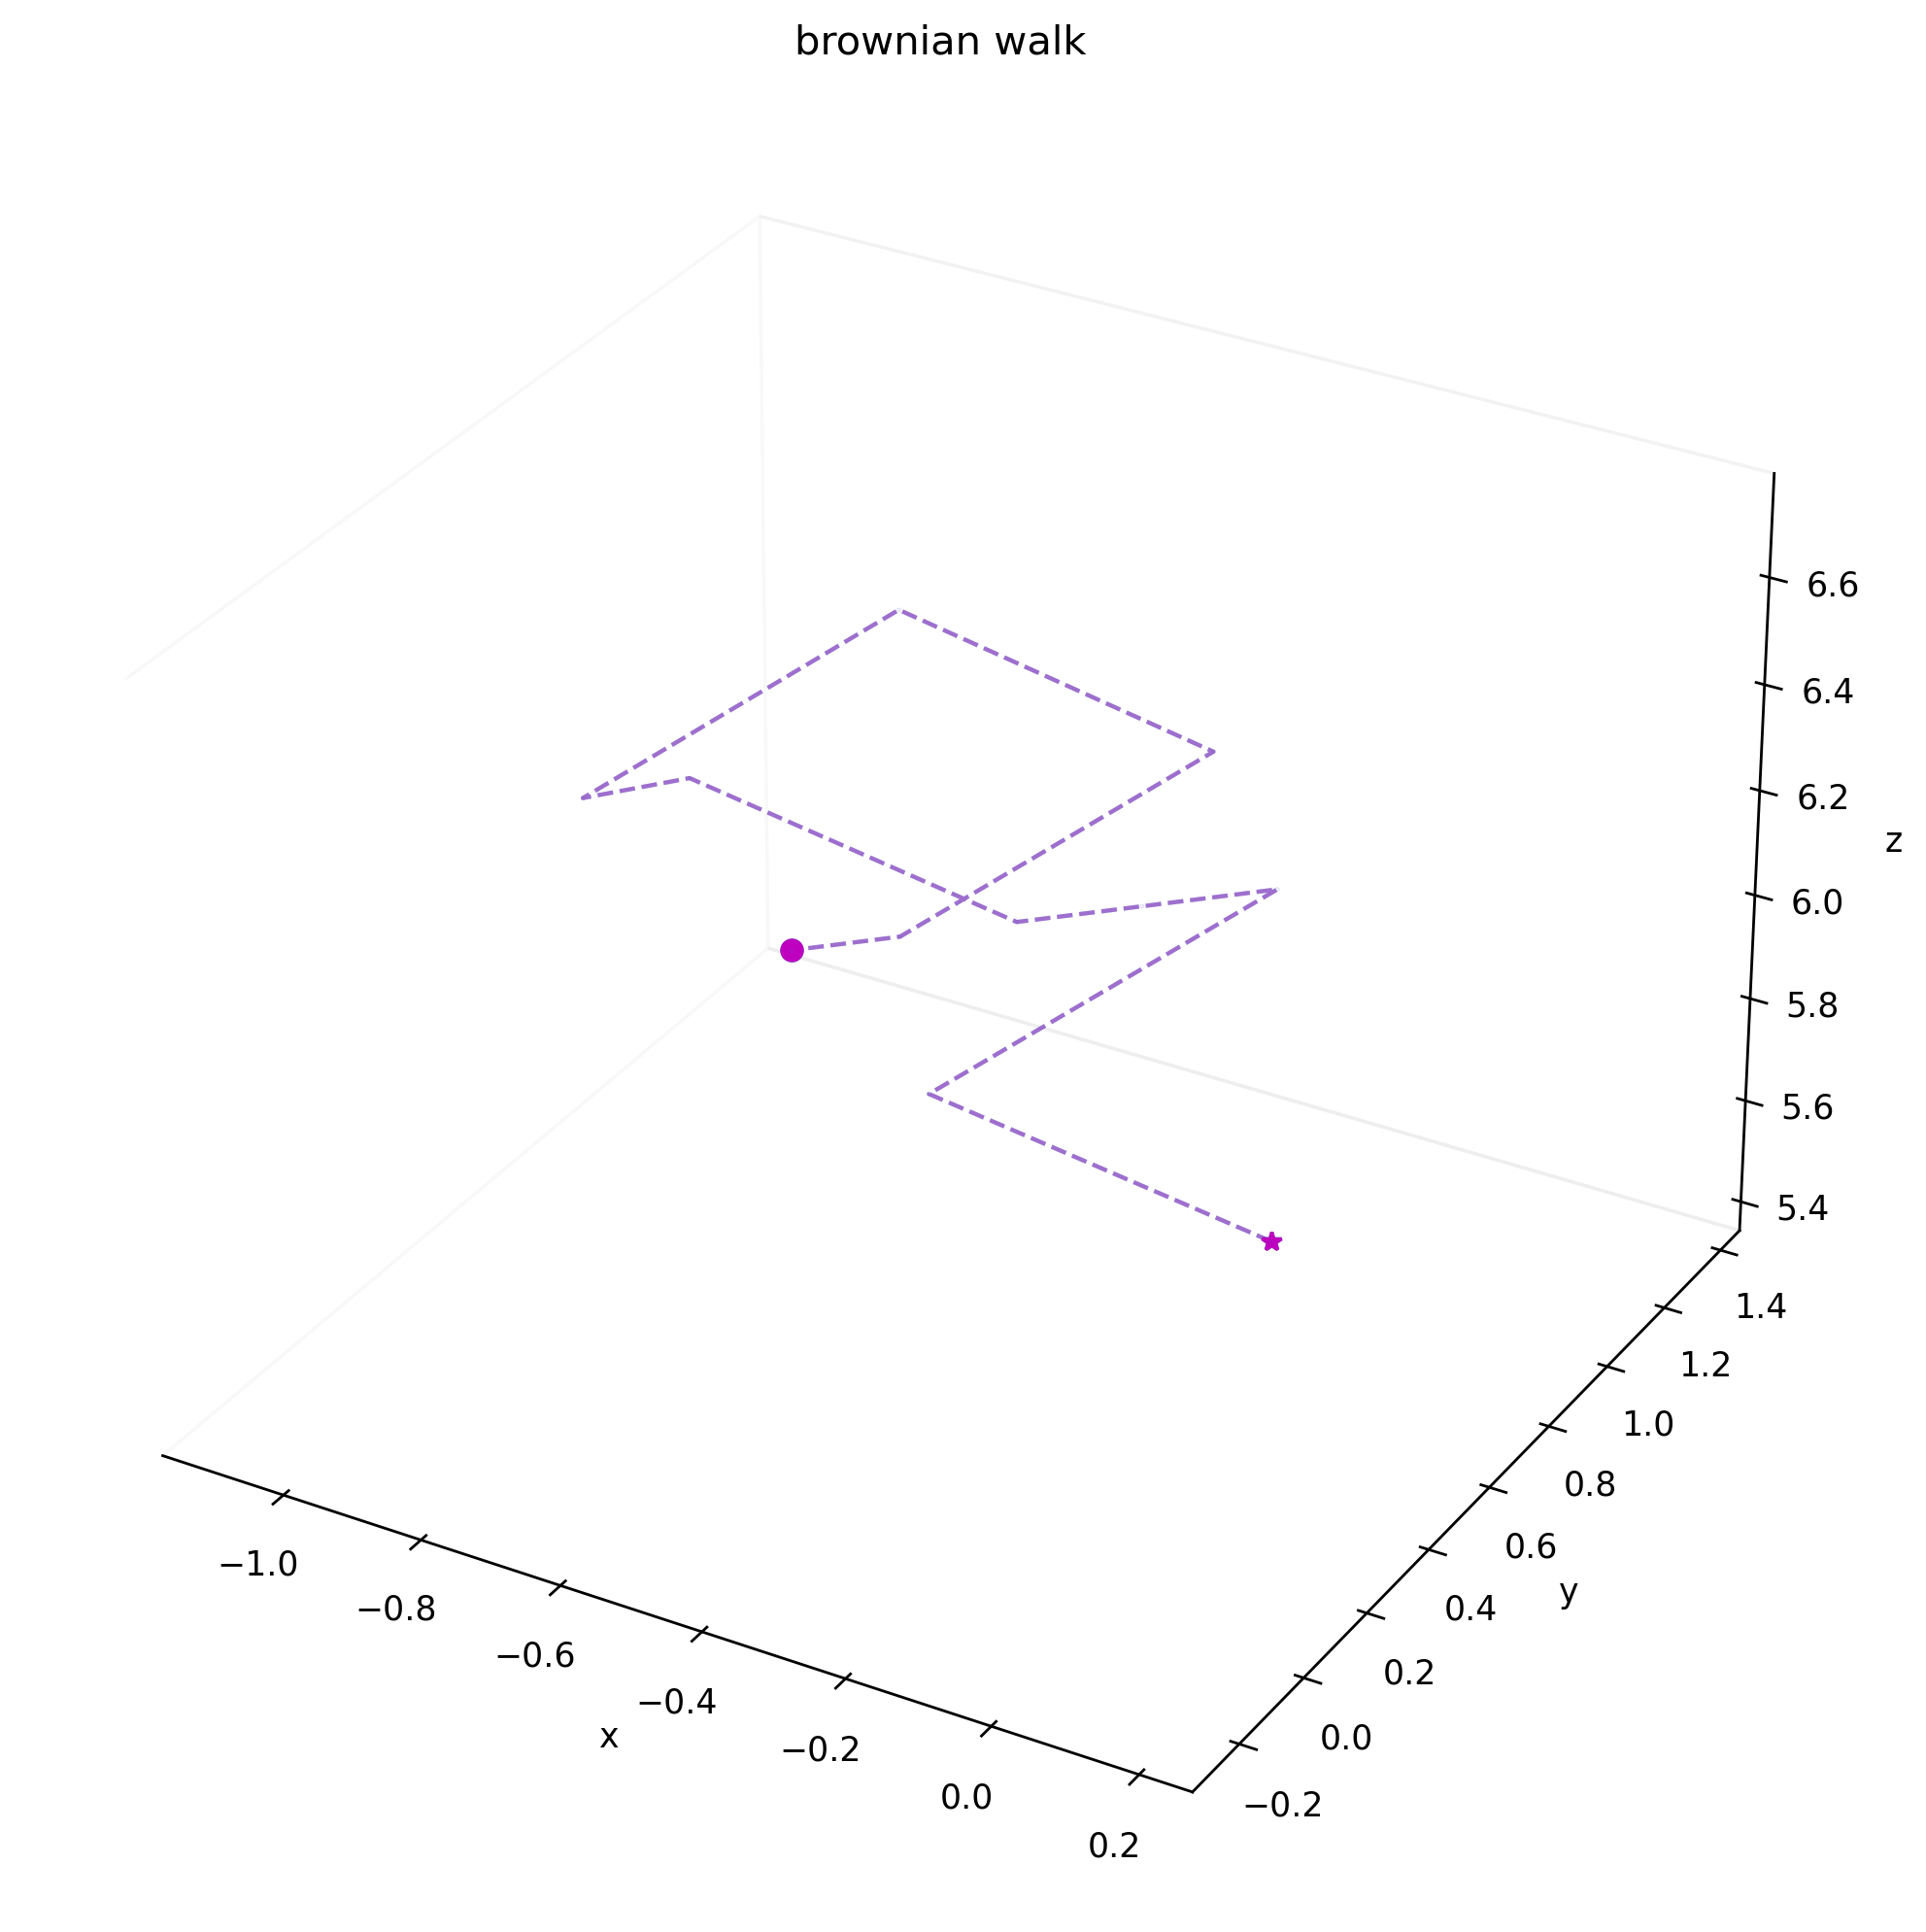